In [1]:
# import and init libraries

from pandas import DataFrame, read_csv

import math
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import sys

# avoiding type 3 fonts: http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# enable inline plotting
%matplotlib inline

sns.set(style="ticks")

In [2]:
# globals

# consistent max value of 4320 (86400/20 - we don't have intervals longer)
number_of_bins = 4320/60
bin_cuts = np.arange(0, 4320, 60)
cut_labels = bin_cuts[:-1]

# set up x-axis tick labels
xtick_labels = [None] * int(4320/60)
# add only a few labels we care about
xtick_labels[2] = '2'   # 2 minute interval
xtick_labels[10] = '10' # 10 minute interval
xtick_labels[20] = '20' # 20 minute interval
xtick_labels[30] = '30' # 30 minute interval
xtick_labels[60] = '60' # 60 minute interval

rsync_2019_bins = 4320/60
rsync_2020_bins = 4320/60

rsync_2019_bin_cuts = np.arange(0, 4320, 60)
rsync_2020_bin_cuts = np.arange(0, 4320, 60)

rsync_2019_cut_labels = rsync_2019_bin_cuts[:-1]
rsync_2020_cut_labels = rsync_2020_bin_cuts[:-1]

In [3]:
### AFRINIC

In [4]:
# AFRINIC RRDP csv data files

AFRINIC_RRDP_2020 = 'imc20/data/rrdp.afrinic.delta.20200404'

afrinic_rrdp_2020 = pd.read_csv(AFRINIC_RRDP_2020,
                    delim_whitespace=True,
                    header=None,
                    names=['2020-04-04', 'RP'])

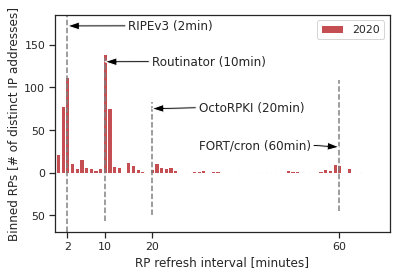

In [5]:
# AFRINIC RRDP sync interval plots

afrinic_rrdp_2020['2020'] = pd.cut(afrinic_rrdp_2020['2020-04-04'], bins=bin_cuts, labels=cut_labels)

# +y plot is 2020
vc1 = afrinic_rrdp_2020['2020'].value_counts(sort=False)
ax1 = vc1.plot.bar(color="r", width=0.9, legend=True)

#ax1.set_ylim(0,150)
ax1.set_ylim(-70,185)

# set meaningful X and Y axis labels
ax1.set_ylabel('Binned RPs [# of distinct IP addresses]')
ax1.set_xlabel('RP refresh interval [minutes]')

ax1.set_xticks([2,10,20,60])
ax1.set_xticklabels(['2', '10', '20', '60'])
#ax1.set_xticklabels(xtick_labels)

# use only positive values for y-tick labels, -y plot values are not negative
ytick_labels = np.absolute(ax1.get_yticks())
ax1.set_yticklabels(ytick_labels.astype(int))

# keep/hiden spines
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)

# draw interval watermark
#ax1.axvline(2,  linestyle='--', color='grey')            ## RIPEv3
#ax1.axvline(10, linestyle='--', color='grey', ymax=.75)  ## Routinator
#ax1.axvline(20, linestyle='--', color='grey', ymax=.50)  ## OctoRPKI
#ax1.axvline(60, linestyle='--', color='grey', ymax=.25)  ## FORT/cron

# annotate interval watermarks
#ax1.annotate('RIPEv3 (2min)',      xy=(2, 142),      xytext=(15,140),      arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('Routinator (10min)', xy=(10, 143*.75), xytext=(20,140*.75),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('OctoRPKI (20min)',   xy=(20, 145*.50), xytext=(30, 140*.50), arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('FORT/cron (60min)',  xy=(60, 148*.25), xytext=(30, 140*.25), arrowprops=dict(facecolor='black', width=2, headwidth=8))

# draw interval watermark
ax1.axvline(2,  linestyle='--', color='grey')                      ## RIPEv3
ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.80)  ## Routinator
ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.60)  ## OctoRPKI
ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.70)  ## FORT/cron

# annotate interval watermarks
ax1.annotate('RIPEv3 (2min)',      xy=(2, 172),  xytext=(15,168),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('Routinator (10min)', xy=(10, 130), xytext=(20, 126), arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('OctoRPKI (20min)',   xy=(20, 75),  xytext=(30, 72),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

ax1.legend(loc='upper right')

plt.xticks(rotation='horizontal')

# save and explicitly close figure
fig = ax1.get_figure()
fig.savefig("imc20/rrdp-afrinic-delta.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)

In [6]:
# AFRNIC rsync csv data files

AFRINIC_RSYNC_2020 = 'imc20/data/rsync.afrinic.delta.20200404'
AFRINIC_RSYNC_2019 = 'imc20/data/rsync.afrinic.delta.20190404'

afrinic_rsync_2020 = pd.read_csv(AFRINIC_RSYNC_2020,
                    delim_whitespace=True,
                    header=None,
                    names=['2020-04-04', 'RP'])
afrinic_rsync_2019 = pd.read_csv(AFRINIC_RSYNC_2019,
                    delim_whitespace=True,
                    header=None,
                    names=['2019-04-04', 'RP'])

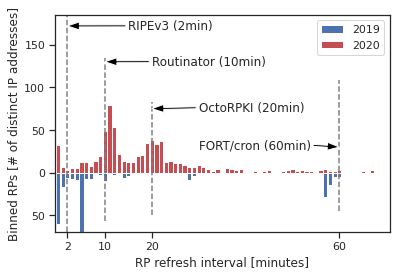

In [7]:
# AFRINIC rsync sync interval plots

afrinic_rsync_2019['2019'] = pd.cut(afrinic_rsync_2019['2019-04-04'], bins=bin_cuts, labels=cut_labels)
afrinic_rsync_2020['2020'] = pd.cut(afrinic_rsync_2020['2020-04-04'], bins=bin_cuts, labels=cut_labels)

# -y plot is 2019
vc1 = afrinic_rsync_2019['2019'].value_counts(sort=False)
vc1 *= -1
ax1 = vc1.plot.bar(color="b", width=0.9, legend=True)

#ax1.set_ylim(-100,95)
ax1.set_ylim(-70,185)

# set meaningful X and Y axis labels
ax1.set_ylabel('Binned RPs [# of distinct IP addresses]')
ax1.set_xlabel('RP refresh interval [minutes]')

# +y plot is 2020
vc2 = afrinic_rsync_2020['2020'].value_counts(sort=False)
ax2 = vc2.plot.bar(ax=ax1, color="r", width=0.9, legend=True)

ax2.set_xticks([2,10,20,60])
ax2.set_xticklabels(['2', '10', '20', '60'])
#ax2.set_xticklabels(xtick_labels)

# use only positive values for y-tick labels, -y plot values are not negative
ytick_labels = np.absolute(ax2.get_yticks())
ax2.set_yticklabels(ytick_labels.astype(int))

# keep/hiden spines
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)

# draw interval watermark
#ax1.axvline(2,  linestyle='--', color='grey')            ## RIPEv3
#ax1.axvline(10, linestyle='--', color='grey', ymin=.10, ymax=.90)  ## Routinator
#ax1.axvline(20, linestyle='--', color='grey', ymin=.20, ymax=.80)  ## OctoRPKI
#ax1.axvline(60, linestyle='--', color='grey', ymin=.30, ymax=.70)  ## FORT/cron

# annotate interval watermarks
#ax1.annotate('RIPEv3 (2min)',      xy=(2, 86),   xytext=(15,83),   arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('Routinator (10min)', xy=(10, -80), xytext=(20, -83), arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('OctoRPKI (20min)',   xy=(20, -65), xytext=(30, -68), arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

# draw interval watermark
ax1.axvline(2,  linestyle='--', color='grey')                      ## RIPEv3
ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.80)  ## Routinator
ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.60)  ## OctoRPKI
ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.70)  ## FORT/cron

# annotate interval watermarks
ax1.annotate('RIPEv3 (2min)',      xy=(2, 172),  xytext=(15,168),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('Routinator (10min)', xy=(10, 130), xytext=(20, 126), arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('OctoRPKI (20min)',   xy=(20, 75),  xytext=(30, 72),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

ax1.legend(loc='upper right')

plt.xticks(rotation='horizontal')

# save and explicitly close figure
fig = ax1.get_figure()
fig.savefig("imc20/rsync-afrinic-delta.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)

In [8]:
### APNIC

In [9]:
# APNIC RRDP csv data files

APNIC_RRDP_2020 = 'imc20/data/rrdp.apnic.delta.20200404'
APNIC_RRDP_2019 = 'imc20/data/rrdp.apnic.delta.20190404'

apnic_rrdp_2020 = pd.read_csv(APNIC_RRDP_2020,
                    delim_whitespace=True,
                    header=None,
                    names=['2020-04-04', 'RP'])
apnic_rrdp_2019 = pd.read_csv(APNIC_RRDP_2019,
                    delim_whitespace=True,
                    header=None,
                    names=['2019-04-04', 'RP'])

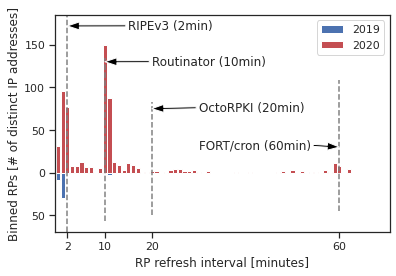

In [10]:
# APNIC RRDP sync interval plots

apnic_rrdp_2019['2019'] = pd.cut(apnic_rrdp_2019['2019-04-04'], bins=bin_cuts, labels=cut_labels)
apnic_rrdp_2020['2020'] = pd.cut(apnic_rrdp_2020['2020-04-04'], bins=bin_cuts, labels=cut_labels)

# -y plot is 2019
vc1 = apnic_rrdp_2019['2019'].value_counts(sort=False)
vc1 *= -1
ax1 = vc1.plot.bar(color="b", width=0.9, legend=True)

#ax1.set_ylim(-35,165)
ax1.set_ylim(-70,185)

# set meaningful X and Y axis labels
ax1.set_ylabel('Binned RPs [# of distinct IP addresses]')
ax1.set_xlabel('RP refresh interval [minutes]')

# +y plot is 2020
vc2 = apnic_rrdp_2020['2020'].value_counts(sort=False)
ax2 = vc2.plot.bar(ax=ax1, color="r", width=0.9, legend=True)

ax2.set_xticks([2,10,20,60])
ax2.set_xticklabels(['2', '10', '20', '60'])
#ax2.set_xticklabels(xtick_labels)

# use only positive values for y-tick labels, -y plot values are not negative
ytick_labels = np.absolute(ax2.get_yticks())
ax2.set_yticklabels(ytick_labels.astype(int))

# keep/hiden spines
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)

# draw interval watermark
#ax1.axvline(2,  linestyle='--', color='grey')            ## RIPEv3
#ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.90)  ## Routinator
#ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.80)  ## OctoRPKI
#ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.70)  ## FORT/cron

# annotate interval watermarks
#ax1.annotate('RIPEv3 (2min)',      xy=(2, 155),  xytext=(15,152),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('Routinator (10min)', xy=(10, 131), xytext=(20, 128), arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('OctoRPKI (20min)',   xy=(20, 75),  xytext=(30, 72),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

# draw interval watermark
ax1.axvline(2,  linestyle='--', color='grey')                      ## RIPEv3
ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.80)  ## Routinator
ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.60)  ## OctoRPKI
ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.70)  ## FORT/cron

# annotate interval watermarks
ax1.annotate('RIPEv3 (2min)',      xy=(2, 172),  xytext=(15,168),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('Routinator (10min)', xy=(10, 130), xytext=(20, 126), arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('OctoRPKI (20min)',   xy=(20, 75),  xytext=(30, 72),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

ax1.legend(loc='upper right')

plt.xticks(rotation='horizontal')

# save and explicitly close figure
fig = ax1.get_figure()
fig.savefig("imc20/rrdp-apnic-delta.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)

In [11]:
# APNIC rsync csv data files

APNIC_RSYNC_2020 = 'imc20/data/rsync.apnic.delta.20200404'
APNIC_RSYNC_2019 = 'imc20/data/rsync.apnic.delta.20190404'

apnic_rsync_2020 = pd.read_csv(APNIC_RSYNC_2020,
                    delim_whitespace=True,
                    header=None,
                    names=['2020-04-04', 'RP'])
apnic_rsync_2019 = pd.read_csv(APNIC_RSYNC_2019,
                    delim_whitespace=True,
                    header=None,
                    names=['2019-04-04', 'RP'])

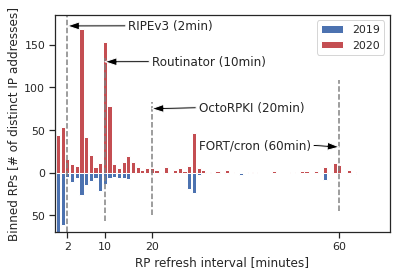

In [12]:
# APNIC rsync sync interval plots

apnic_rsync_2019['2019'] = pd.cut(apnic_rsync_2019['2019-04-04'], bins=bin_cuts, labels=cut_labels)
apnic_rsync_2020['2020'] = pd.cut(apnic_rsync_2020['2020-04-04'], bins=bin_cuts, labels=cut_labels)

# -y plot is 2019
vc1 = apnic_rsync_2019['2019'].value_counts(sort=False)
vc1 *= -1
ax1 = vc1.plot.bar(color="b", width=0.9, legend=True)

# set meaningful X and Y axis labels
ax1.set_ylabel('Binned RPs [# of distinct IP addresses]')
ax1.set_xlabel('RP refresh interval [minutes]')

# +y plot is 2020
vc2 = apnic_rsync_2020['2020'].value_counts(sort=False)
ax2 = vc2.plot.bar(ax=ax1, color="r", width=0.9, legend=True)

ax1.set_ylim(-70,185)

ax2.set_xticks([2,10,20,60])
ax2.set_xticklabels(['2', '10', '20', '60'])
#ax2.set_xticklabels(xtick_labels)

# use only positive values for y-tick labels, -y plot values are not negative
ytick_labels = np.absolute(ax2.get_yticks())
ax2.set_yticklabels(ytick_labels.astype(int))

# keep/hiden spines
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)

# draw interval watermark
ax1.axvline(2,  linestyle='--', color='grey')                      ## RIPEv3
ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.80)  ## Routinator
ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.60)  ## OctoRPKI
ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.70)  ## FORT/cron

# annotate interval watermarks
ax1.annotate('RIPEv3 (2min)',      xy=(2, 172),  xytext=(15,168),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('Routinator (10min)', xy=(10, 130), xytext=(20, 126), arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('OctoRPKI (20min)',   xy=(20, 75),  xytext=(30, 72),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

ax1.legend(loc='upper right')

plt.xticks(rotation='horizontal')

# save and explicitly close figure
fig = ax1.get_figure()
fig.savefig("imc20/rsync-apnic-delta.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)

In [13]:
### ca.rg.net

In [14]:
# ca.rg.net RRDP csv data files

CA_RG_NET_RRDP_2020 = 'imc20/data/rrdp.ca.rg.net.delta.20200404'
CA_RG_NET_RRDP_2019 = 'imc20/data/rrdp.ca.rg.net.delta.20190404'

ca_rg_net_rrdp_2020 = pd.read_csv(CA_RG_NET_RRDP_2020,
                    delim_whitespace=True,
                    header=None,
                    names=['2020-04-04', 'RP'])
ca_rg_net_rrdp_2019 = pd.read_csv(CA_RG_NET_RRDP_2019,
                    delim_whitespace=True,
                    header=None,
                    names=['2019-04-04', 'RP'])

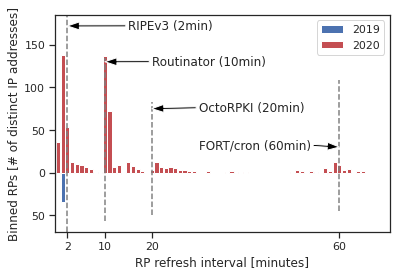

In [15]:
# ca.rg.net RRDP sync interval plots

ca_rg_net_rrdp_2019['2019'] = pd.cut(ca_rg_net_rrdp_2019['2019-04-04'], bins=bin_cuts, labels=cut_labels)
ca_rg_net_rrdp_2020['2020'] = pd.cut(ca_rg_net_rrdp_2020['2020-04-04'], bins=bin_cuts, labels=cut_labels)

# -y plot is 2019
vc1 = ca_rg_net_rrdp_2019['2019'].value_counts(sort=False)
vc1 *= -1
ax1 = vc1.plot.bar(color="b", width=0.9, legend=True)

#ax1.set_ylim(-45,150)
ax1.set_ylim(-70,185)

# set meaningful X and Y axis labels
ax1.set_ylabel('Binned RPs [# of distinct IP addresses]')
ax1.set_xlabel('RP refresh interval [minutes]')

# +y plot is 2020
vc2 = ca_rg_net_rrdp_2020['2020'].value_counts(sort=False)
ax2 = vc2.plot.bar(ax=ax1, color="r", width=0.9, legend=True)

ax2.set_xticks([2,10,20,60])
ax2.set_xticklabels(['2', '10', '20', '60'])
#ax2.set_xticklabels(xtick_labels)

# use only positive values for y-tick labels, -y plot values are not negative
ytick_labels = np.absolute(ax2.get_yticks())
ax2.set_yticklabels(ytick_labels.astype(int))

# keep/hiden spines
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)

# draw interval watermark
#ax1.axvline(2,  linestyle='--', color='grey')            ## RIPEv3
#ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.80)  ## Routinator
#ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.60)  ## OctoRPKI
#ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.40)  ## FORT/cron

# annotate interval watermarks
#ax1.annotate('RIPEv3 (2min)',      xy=(2, 142),  xytext=(15,138),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('Routinator (10min)', xy=(10, 106), xytext=(20, 103), arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('OctoRPKI (20min)',   xy=(20, 70),  xytext=(30, 67),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

# draw interval watermark
ax1.axvline(2,  linestyle='--', color='grey')                      ## RIPEv3
ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.80)  ## Routinator
ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.60)  ## OctoRPKI
ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.70)  ## FORT/cron

# annotate interval watermarks
ax1.annotate('RIPEv3 (2min)',      xy=(2, 172),  xytext=(15,168),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('Routinator (10min)', xy=(10, 130), xytext=(20, 126), arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('OctoRPKI (20min)',   xy=(20, 75),  xytext=(30, 72),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

ax1.legend(loc='upper right')

plt.xticks(rotation='horizontal')

# save and explicitly close figure
fig = ax1.get_figure()
fig.savefig("imc20/rrdp-ca-rg-net-delta.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)

In [16]:
# ca.rg.net rsync csv data files

CA_RG_NET_RSYNC_2020 = 'imc20/data/rsync.ca.rg.net.delta.20200404'
CA_RG_NET_RSYNC_2019 = 'imc20/data/rsync.ca.rg.net.delta.20190404'

ca_rg_net_rsync_2020 = pd.read_csv(CA_RG_NET_RSYNC_2020,
                    delim_whitespace=True,
                    header=None,
                    names=['2020-04-04', 'RP'])
ca_rg_net_rsync_2019 = pd.read_csv(CA_RG_NET_RSYNC_2019,
                    delim_whitespace=True,
                    header=None,
                    names=['2019-04-04', 'RP'])

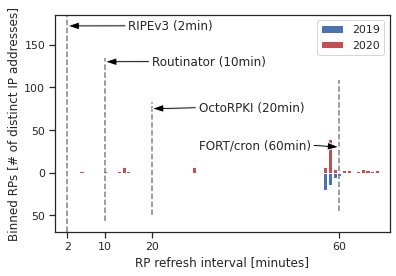

In [17]:
# ca.rg.net rsync sync interval plots

ca_rg_net_rsync_2019['2019'] = pd.cut(ca_rg_net_rsync_2019['2019-04-04'], bins=bin_cuts, labels=cut_labels)
ca_rg_net_rsync_2020['2020'] = pd.cut(ca_rg_net_rsync_2020['2020-04-04'], bins=bin_cuts, labels=cut_labels)

# -y plot is 2019
vc1 = ca_rg_net_rsync_2019['2019'].value_counts(sort=False)
vc1 *= -1
ax1 = vc1.plot.bar(color="b", width=0.9, legend=True)

#ax1.set_ylim(-30,45)
ax1.set_ylim(-70,185)

# set meaningful X and Y axis labels
ax1.set_ylabel('Binned RPs [# of distinct IP addresses]')
ax1.set_xlabel('RP refresh interval [minutes]')

# +y plot is 2020
vc2 = ca_rg_net_rsync_2020['2020'].value_counts(sort=False)
ax2 = vc2.plot.bar(ax=ax1, color="r", width=0.9, legend=True)

ax2.set_xticks([2,10,20,60])
ax2.set_xticklabels(['2', '10', '20', '60'])
#ax2.set_xticklabels(xtick_labels)

# use only positive values for y-tick labels, -y plot values are not negative
ytick_labels = np.absolute(ax2.get_yticks())
ax2.set_yticklabels(ytick_labels.astype(int))

# keep/hiden spines
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)

# draw interval watermark
#ax1.axvline(2,  linestyle='--', color='grey')            ## RIPEv3
#ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.80)  ## Routinator
#ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.60)  ## OctoRPKI
#ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.80)  ## FORT/cron

# annotate interval watermarks
#ax1.annotate('RIPEv3 (2min)',      xy=(2, 40),  xytext=(15,39),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('Routinator (10min)', xy=(10, 28), xytext=(20, 27), arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('OctoRPKI (20min)',   xy=(20, -7),  xytext=(30, -8),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
#ax1.annotate('FORT/cron (60min)',  xy=(60, 15),  xytext=(30, 14),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

# draw interval watermark
ax1.axvline(2,  linestyle='--', color='grey')                      ## RIPEv3
ax1.axvline(10, linestyle='--', color='grey', ymin=.05, ymax=.80)  ## Routinator
ax1.axvline(20, linestyle='--', color='grey', ymin=.08, ymax=.60)  ## OctoRPKI
ax1.axvline(60, linestyle='--', color='grey', ymin=.10, ymax=.70)  ## FORT/cron

# annotate interval watermarks
ax1.annotate('RIPEv3 (2min)',      xy=(2, 172),  xytext=(15,168),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('Routinator (10min)', xy=(10, 130), xytext=(20, 126), arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('OctoRPKI (20min)',   xy=(20, 75),  xytext=(30, 72),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
ax1.annotate('FORT/cron (60min)',  xy=(60, 30),  xytext=(30, 28),  arrowprops=dict(facecolor='black', width=2, headwidth=8))

ax1.legend(loc='upper right')

plt.xticks(rotation='horizontal')

# save and explicitly close figure
fig = ax1.get_figure()
fig.savefig("imc20/rsync-ca-rg-net-delta.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)